# 2022 NZMSA Data Science Submission.

In [79]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [80]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [81]:
#Describe the data using Mean, Std, and the 25th and 75th percentiles
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


Here is a visual representation of the data spread

tmpc                 AxesSubplot(0.125,0.547727;0.227941x0.352273)
dwpc              AxesSubplot(0.398529,0.547727;0.227941x0.352273)
relh              AxesSubplot(0.672059,0.547727;0.227941x0.352273)
sknt                    AxesSubplot(0.125,0.125;0.227941x0.352273)
gust                 AxesSubplot(0.398529,0.125;0.227941x0.352273)
peak_wind_drct       AxesSubplot(0.672059,0.125;0.227941x0.352273)
dtype: object

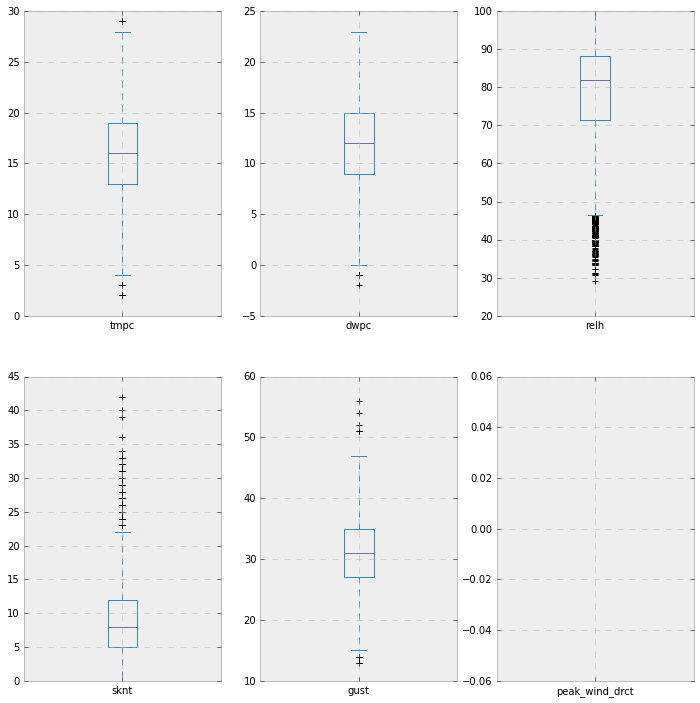

In [82]:
dataset.plot(figsize=(12,12),kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)

sknt has the highest count number, followed closely by tmpc and dwpc which is then followed closely by relh, and then gust. peak_wind_drct has a count of zero and therefore no data.

In [83]:
dataset.info()
dataset.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


0

This confirms that peak_wind_drct is completely null. It also shows that all of the data columns contain null values in different rows.
The valid column is also treated as an object but needs to be a dateTime.
I am also checking for any duplicates within the data

In [84]:
dataset['valid'] = pd.to_datetime(dataset['valid'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0    station        103713 non-null  object        
 1   valid           103713 non-null  datetime64[ns]
 2   tmpc            103678 non-null  float64       
 3   dwpc            103678 non-null  float64       
 4   relh            103593 non-null  float64       
 5   sknt            103704 non-null  float64       
 6   gust            1203 non-null    float64       
 7   peak_wind_drct  0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.3+ MB


<AxesSubplot:>

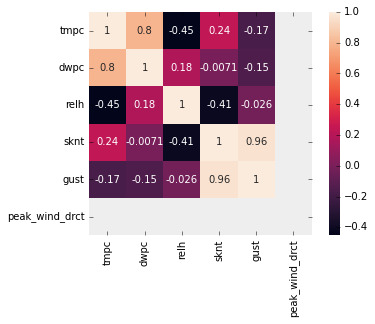

In [85]:

sns.heatmap(dataset.corr(), annot=True, square=True)

Correlation is seen the closer the values are to 1 and -1.   
There are multiple observed correlations with tmpc and dwpc & relh.  
There are also correlations with gust and sknt, and between sknt and relh.  
There are two strong correlations, being between tmpc & dwpc and sknt & gust.  
There are moderate correlations with tmpc & relh and sknt & relh.  

C:\Users\fakec\AppData\Local\Temp\ipykernel_1536\2769855982.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


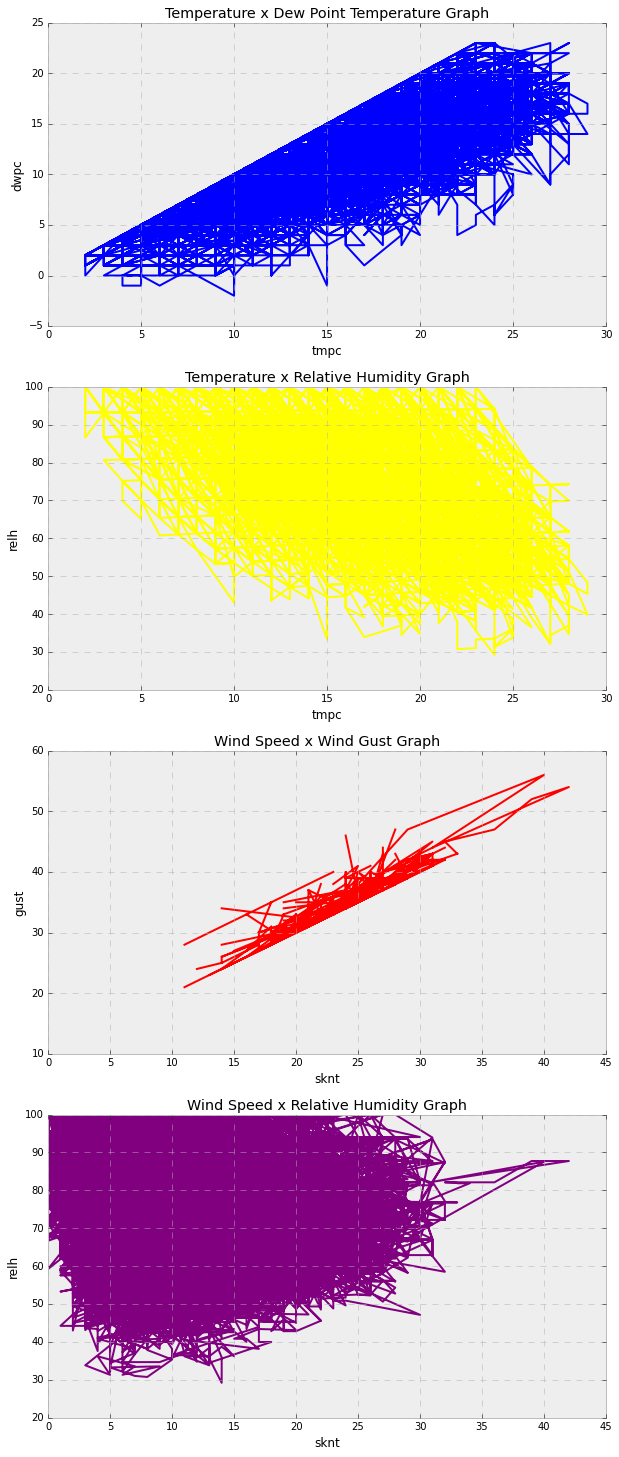

In [86]:
plt.style.use("bmh")
figure, (axis1, axis2, axis3, axis4) = plt.subplots(nrows=4, ncols=1,squeeze=True)

axis1.plot(dataset["tmpc"], dataset["dwpc"], color="blue",)
axis1.set_title("Temperature x Dew Point Temperature Graph")
axis1.set_xlabel("tmpc")
axis1.set_ylabel("dwpc")

axis2.plot(dataset["tmpc"], dataset["relh"], color="yellow")
axis2.set_title("Temperature x Relative Humidity Graph")
axis2.set_xlabel("tmpc")
axis2.set_ylabel("relh")

axis3.plot(dataset["sknt"], dataset["gust"], color="red")
axis3.set_title("Wind Speed x Wind Gust Graph")
axis3.set_xlabel("sknt")
axis3.set_ylabel("gust")

axis4.plot(dataset["sknt"], dataset["relh"], color="purple")
axis4.set_title("Wind Speed x Relative Humidity Graph")
axis4.set_xlabel("sknt")
axis4.set_ylabel("relh")


figure.set_size_inches(10,25)
figure.show()

# Data Processing

In [87]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

# Data Modelling

In [88]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.